<a href="https://www.kaggle.com/code/amosjeromeolal/diabetes-prediction-cdss-system?scriptVersionId=228676612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


# Import dependencies 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load dataset

In [3]:

df=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
#Check the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis(EDA)

In [4]:
#Basic Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
#Check missing calues
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Cleaning the dataset

In [7]:
# Replace zeros with NaN in critical columns
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_to_replace]= df[columns_to_replace].replace(0, np.nan)
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [8]:
# Replace zero values with median (for columns where 0 is incorrect)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

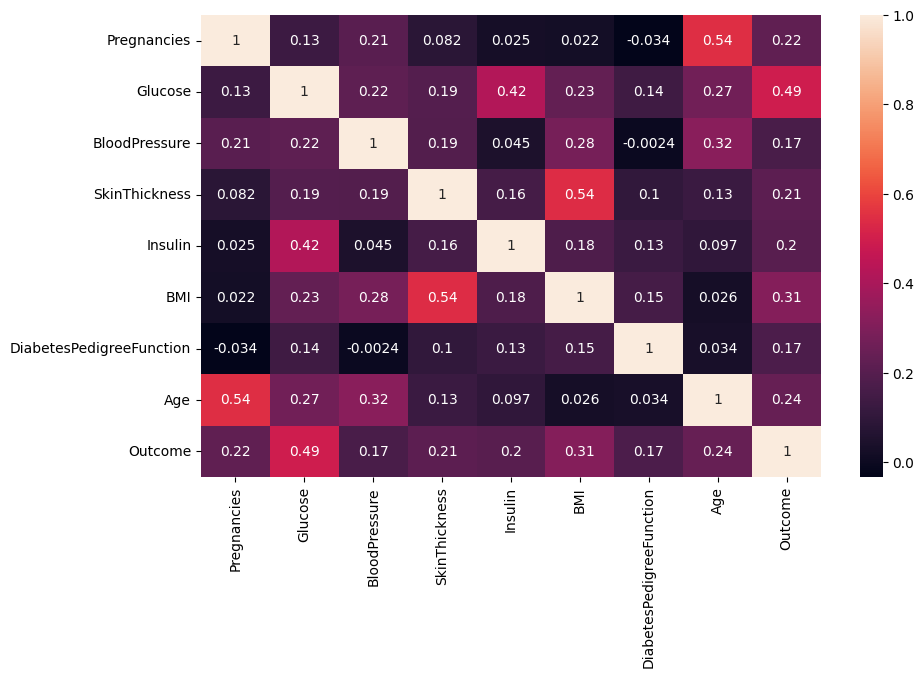

In [9]:
#Visualize correlation between columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
cmap="coolwarm"
plt.show()

# Data Processing

In [10]:
#Split into featires and targets
# Drop least important features
X = df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness'])
y=df['Outcome']

In [11]:
#Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#Standardize the features
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Build the model

In [13]:
#Old model
# rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:

# Train Random Forest with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=400,       # More trees
    max_depth=10,           # Limits depth for better generalization
    min_samples_split=4,    # Prevents overfitting
    min_samples_leaf=2,     # More stable splits
    max_features='sqrt',    # Uses sqrt(features) for best splits
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=400, random_state=42)

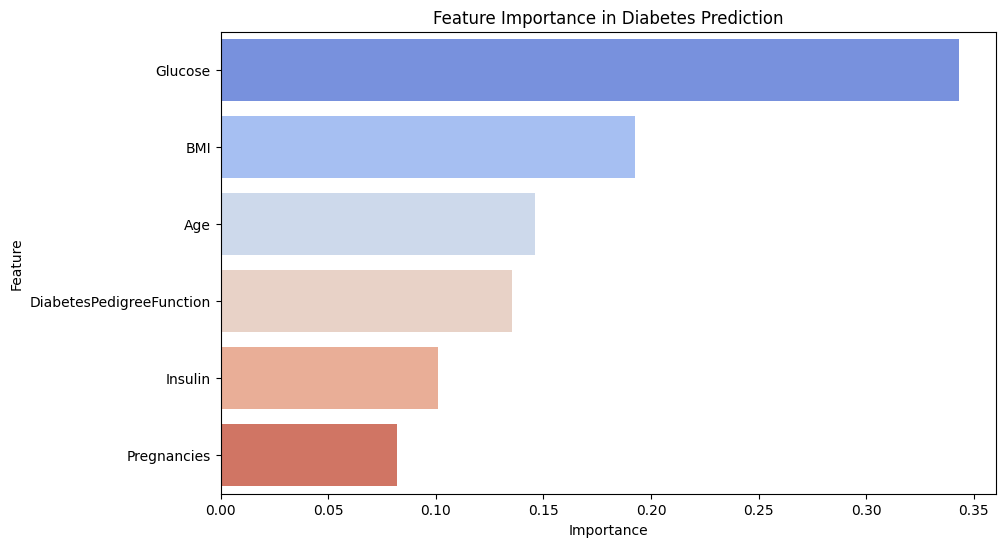

                    Feature  Importance
1                   Glucose    0.342906
3                       BMI    0.192403
5                       Age    0.145884
4  DiabetesPedigreeFunction    0.135604
2                   Insulin    0.101185
0               Pregnancies    0.082019


In [15]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(feature_importance_df)


In [16]:
#use the model to make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC

Accuracy: 0.7532


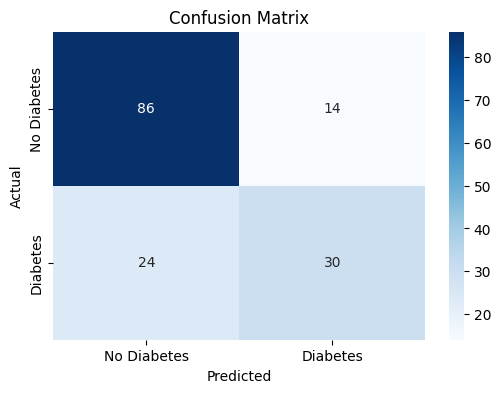

AUC-ROC Score: 0.8159


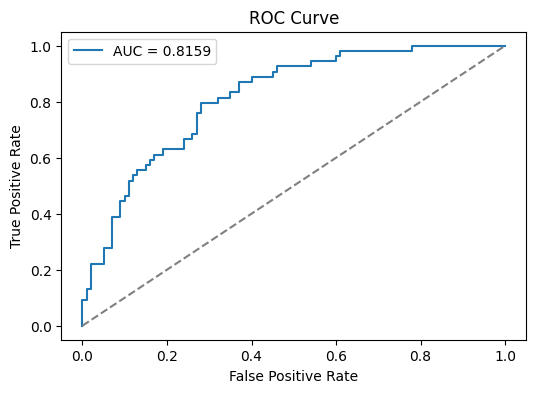

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))